# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords #natural language tool kit
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NOURA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Printing the stopwords in English


In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Reading the Dataset

In [5]:
dataset = pd.read_csv("C:/Users/NOURA/Downloads/Fake News/data.csv")

# Print the first 5 rows

In [6]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Show number of rows & columns

In [7]:
dataset.shape

(20800, 5)

# Counting the number of missing values in the dataset

In [8]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# Replacing the null values with empty string

In [9]:
dataset = dataset.fillna('')

# Merging the author name and news title

In [10]:
dataset['content'] = dataset['author']+' '+dataset['title']

In [11]:
print(dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


# Separating the data & label

In [12]:
X = dataset.drop(columns='label', axis=1)
Y = dataset['label']

# Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
dataset['content'] = dataset['content'].apply(stemming)

In [16]:
print(dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


# Separating the data & label


In [17]:
X = dataset['content'].values
Y = dataset['label'].values

# Converting the textual data to numerical data


In [18]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [19]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Splitting the dataset to training & test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=50)

# Training the Model1: Logistic Regression

In [21]:
model1 = LogisticRegression()

In [22]:
model1.fit(X_train, Y_train)

LogisticRegression()

# Accuracy score on the train data

In [23]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [24]:
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  98.76201923076923


# Accuracy score on the test data

In [25]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  97.47596153846155


In [27]:
m1=test_data_accuracy*100

# Training the Model2: Decision Tree

In [28]:
model2 = DecisionTreeClassifier(max_depth=25,random_state=2)

In [29]:
model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=25, random_state=2)

# Accuracy score on the train data

In [30]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  98.0829326923077


# Accuracy score on the test data

In [32]:
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  97.74038461538461


In [34]:
m2=test_data_accuracy*100

# Training the Model3: Random Forest

In [35]:
model3 = RandomForestClassifier(max_depth=25, random_state=2)

In [36]:
model3.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, random_state=2)

# Accuracy score on the train data

In [37]:
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  95.67908653846153


# Accuracy score on the test data

In [39]:
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  94.95192307692307


In [41]:
m3=test_data_accuracy*100

# Choosing best K in Model4: K-Nearest Neighbor

In [42]:
k =range(2,5)
training_accuracy=[]
testing_accuracy=[]
score=0

In [43]:
for i in k:
    model4 =KNeighborsClassifier(n_neighbors=i)
    model4.fit(X_train,Y_train)
    Y_predict_train=model4.predict(X_train)
    training_accuracy.append(accuracy_score(Y_train, Y_predict_train))
    Y_predict_test=model4.predict(X_test)
    acc_score= (accuracy_score(Y_test,Y_predict_test))
    testing_accuracy.append(acc_score)
    if score<acc_score:
        score=acc_score
        best_k=i

In [44]:
print(best_k)

2


# Accuracy score on the train data

In [45]:
print('Accuracy score of the training data : ',training_accuracy[0]*100)

Accuracy score of the training data :  99.93389423076923


# Accuracy score on the test data

In [46]:
print('Accuracy score of the test data : ',testing_accuracy[0]*100)

Accuracy score of the test data :  58.84615384615385


In [47]:
m4=testing_accuracy[0]*100

# Training the Model5: Support Vector Machines

In [48]:
model5 = svm.SVC()

In [49]:
model5.fit(X_train,Y_train)

SVC()

# Accuracy score on the train data

In [50]:
X_train_prediction = model5.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  99.89182692307692


# Accuracy score on the test data

In [52]:
X_test_prediction = model5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  98.79807692307693


In [54]:
m5=test_data_accuracy*100

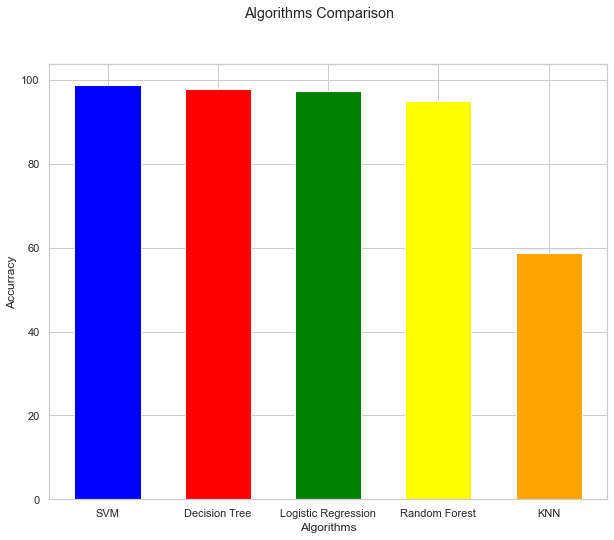

In [55]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Algorithms Comparison")
x=["SVM","Decision Tree","Logistic Regression","Random Forest","KNN"]
y=[m5,m2,m1,m3,m4]
z=["blue","red","green","yellow","orange"]
plt.bar(x,y,width=0.6,color=z)
plt.xlabel("Algorithms")
plt.ylabel("Accurracy")
plt.show()

Support Vector Machines is the highest accuracy so we will save it 

In [56]:
filename = "The_Best_model.joblib"
joblib.dump(model5, filename)

['The_Best_model.joblib']

Now we can use it to test data 

In [57]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.9879807692307693
